# Bag of words

In [1]:
#bag of words 모델 == 단어 가방 모델, 빈도만 연산
#단어의 빈도 분포도(성) 파악=> 표현=> 텍스트 자체의 성격

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#scikit learn, python 기계학습 모듈

corpus = [
'Data Science is an overlap between Arts and Science',
'Generally, Arts graduates are right-brained and Science graduates are left-brained',
'Excelling in both Arts and Science at a time becomes difficult',
'Natural Language Processing is a part of Data Science'
] #list of text-string(문자열 데이터의 리스트형)

### all words

In [2]:
#단어 가방 모델
bag_of_words_model = CountVectorizer() #객체

print(bag_of_words_model.fit_transform(corpus).todense()) #one-hot-coding, 2, 3이나 1< 큰 경우를 모두 1로 변환
#list of list(리스트 안 리스트)

[[1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0]
 [0 1 2 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]]


In [3]:
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())
#data frame이 list of list
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
#행렬 matrix ==> 벡터화, 벡터 연산, 기하&벡터
bag_of_word_df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,2,0
1,0,1,2,1,0,0,0,0,2,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,0,1,0


### most 10 frequent words

In [4]:
bag_of_words_model_small = CountVectorizer(max_features=10)

bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())
bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)

bag_of_word_df_small.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,1,1,0,1,0,1,0,1,0,2
1,0,1,2,1,2,0,2,0,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,1


# Zipf's Law

In [5]:
from pylab import *

#nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

import re
import string

from collections import Counter

newsgroups_data_sample = fetch_20newsgroups(subset='train')

In [12]:
newsgroups_data_sample
#key, value(list형태)

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [6]:
stop_words = stopwords.words('english') 

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)


In [7]:
tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                    if word.lower() not in stop_words]

#for sentence in newsgroups_dat_sample['data']:
#    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)):
#        if word.lower() not in stop_words:
#            tokenized_corpus.append(word.lower())

In [11]:
tokenized_corpus

['lerxst',
 'wam',
 'umd',
 'edu',
 'thing',
 'subject',
 'car',
 'nntp',
 'posting',
 'host',
 'rac3',
 'wam',
 'umd',
 'edu',
 'organization',
 'university',
 'maryland',
 'college',
 'park',
 'lines',
 '15',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 'door',
 'sports',
 'car',
 'looked',
 'late',
 '60s',
 'early',
 '70s',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'neighborhood',
 'lerxst',
 'guykuo',
 'carson',
 'washington',
 'edu',
 'guy',
 'kuo',
 'subject',
 'si',
 'clock',
 'poll',
 'final',
 'call',
 'summary',
 'final',
 'call',
 'si',
 'clock',
 'reports',
 'keywords',
 'si',
 'acceleration',
 'clock',
 'upgrade',
 'article',
 'shelley',
 '1qvf

In [8]:
#counter 함수를 사용해서 개수를 세게 됨

token_count_di = Counter(tokenized_corpus)
'''
dict = {}
for items in list:
    if dict[item] in dict:
        dict[item] += 1
    else:
        dict[item] = 1
'''

In [9]:
token_count_di.most_common(50) 

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

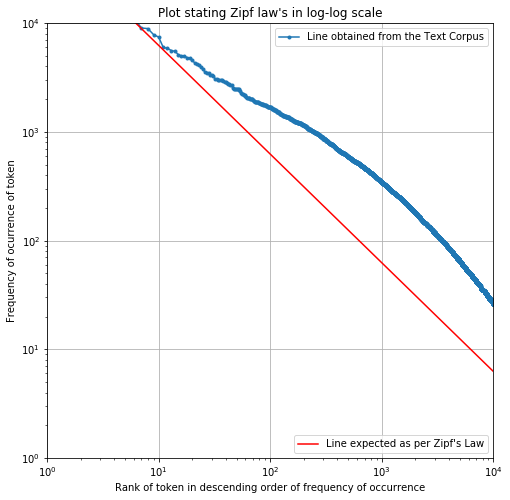

In [10]:
frequencies = [b for (a,b) in token_count_di.most_common(10000)] #빈도
tokens = [a for (a,b) in token_count_di.most_common(10000)] #단어
ranks = range(1, len(frequencies)+1)


plt.figure(figsize=(8,8)) #그래프 그리기
plt.ylim(1,10**4)
plt.xlim(1,10**4)

#Actual ranks and frequencies
obtained_line, = loglog(ranks, frequencies, marker=".", label="Line obtained from the Text Corpus")
obtained_legend = plt.legend(handles=[obtained_line], loc=1)
ax = plt.gca().add_artist(obtained_legend)

#Expected ranks and frequnecies as per Zipf's law
expected_line, = plt.plot([1,frequencies[0]],[frequencies[0],1],color='r',label="Line expected as per Zipf's Law")
plt.legend(handles=[expected_line], loc=4)

title("Plot stating Zipf law's in log-log scale")
xlabel("Rank of token in descending order of frequency of occurrence")
ylabel("Frequency of ocurrence of token")
grid(True)

# TF-IDF

In [13]:
#backup은 빈도
#idf는 빈도를 역수로 바꿔줌. 해당 문서당 빈도가 어떻가 나타나는지 역수로 만들어줌.
#기준이 되는 벡터를 norm vector로 치환(x축에서 얼마나 멀어져있나 거리를 측정하면 들쭉날쭉)
#두 거리를 cos형태로 측정(각도로).
#norm vector: 제곱하고 루트를 씌워서 실제 벡터를 나누면 정규화가 된다 1/4 원(90도)안에 다 들어가게 된다

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
'Data Science is an overlap between Arts and Science',
'Generally, Arts graduates are right-brained and Science graduates are left-brained',
'Excelling in both Arts and Science at a time becomes difficult',
'Natural Language Processing is a part of Data Science'
]

### all words

In [15]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

In [16]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,0.403328,0.257439,0.000000,0.257439,0.000000,0.000000,0.403328,0.000000,0.000000,0.317989,...,0.000000,0.000000,0.000000,0.000000,0.403328,0.000000,0.000000,0.000000,0.420947,0.000000
1,0.000000,0.159139,0.498644,0.159139,0.000000,0.000000,0.000000,0.000000,0.498644,0.000000,...,0.000000,0.249322,0.000000,0.000000,0.000000,0.000000,0.000000,0.249322,0.130107,0.000000
2,0.000000,0.224449,0.000000,0.224449,0.351643,0.351643,0.000000,0.351643,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183502,0.351643
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308872,...,0.391765,0.000000,0.391765,0.391765,0.000000,0.391765,0.391765,0.000000,0.204439,0.000000


### most 10 frequent words

In [17]:
tfidf_model_small = TfidfVectorizer(max_features=10)

tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(corpus).todense())
tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)

tfidf_df_small.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,0.491042,0.313426,0.000000,0.313426,0.000000,0.387143,0.000000,0.387143,0.000000,0.512492
1,0.000000,0.170061,0.532867,0.170061,0.532867,0.000000,0.532867,0.000000,0.266433,0.139036
2,0.000000,0.612172,0.000000,0.612172,0.000000,0.000000,0.000000,0.000000,0.000000,0.500491
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.640434,0.000000,0.640434,0.000000,0.423897


<p>Tf means <strong>term-frequency</strong> while tf–idf means term-frequency times
<strong>inverse document-frequency</strong>:
<span class="math notranslate nohighlight">\(\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}\)</span>.</p>
<p>Using the <code class="docutils literal notranslate"><span class="pre">TfidfTransformer</span></code>’s default settings,
<code class="docutils literal notranslate"><span class="pre">TfidfTransformer(norm='l2',</span> <span class="pre">use_idf=True,</span> <span class="pre">smooth_idf=True,</span> <span class="pre">sublinear_tf=False)</span></code>
the term frequency, the number of times a term occurs in a given document,
is multiplied with idf component, which is computed as</p>
<p><span class="math notranslate nohighlight">\(\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1\)</span>,</p>
<p>where <span class="math notranslate nohighlight">\(n\)</span> is the total number of documents in the document set, and
<span class="math notranslate nohighlight">\(\text{df}(t)\)</span> is the number of documents in the document set that
contain term <span class="math notranslate nohighlight">\(t\)</span>. The resulting tf-idf vectors are then normalized by the
Euclidean norm:</p>
<p><span class="math notranslate nohighlight">\(v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}\)</span>.</p>
<p>This was originally a term weighting scheme developed for information retrieval
(as a ranking function for search engines results) that has also found good
use in document classification and clustering.</p>
<p>The following sections contain further explanations and examples that
illustrate how the tf-idfs are computed exactly and how the tf-idfs
computed in scikit-learn’s <a class="reference internal" href="generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer" title="sklearn.feature_extraction.text.TfidfTransformer"><code class="xref py py-class docutils literal notranslate"><span class="pre">TfidfTransformer</span></code></a>
and <a class="reference internal" href="generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer" title="sklearn.feature_extraction.text.TfidfVectorizer"><code class="xref py py-class docutils literal notranslate"><span class="pre">TfidfVectorizer</span></code></a> differ slightly from the standard textbook
notation that defines the idf as</p>
<p><span class="math notranslate nohighlight">\(\text{idf}(t) = \log{\frac{n}{1+\text{df}(t)}}.\)</span></p>
<p>In the <a class="reference internal" href="generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer" title="sklearn.feature_extraction.text.TfidfTransformer"><code class="xref py py-class docutils literal notranslate"><span class="pre">TfidfTransformer</span></code></a> and <a class="reference internal" href="generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer" title="sklearn.feature_extraction.text.TfidfVectorizer"><code class="xref py py-class docutils literal notranslate"><span class="pre">TfidfVectorizer</span></code></a>
with <code class="docutils literal notranslate"><span class="pre">smooth_idf=False</span></code>, the
“1” count is added to the idf instead of the idf’s denominator:</p>
<p><span class="math notranslate nohighlight">\(\text{idf}(t) = \log{\frac{n}{\text{df}(t)}} + 1\)</span></p>
<p>This normalization is implemented by the <a class="reference internal" href="generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer" title="sklearn.feature_extraction.text.TfidfTransformer"><code class="xref py py-class docutils literal notranslate"><span class="pre">TfidfTransformer</span></code></a>

<p>Each row is normalized to have unit Euclidean norm:</p>
<p><span class="math notranslate nohighlight">\(v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}\)</span></p>
<p>For example, we can compute the tf-idf of the first term in the first
document in the <code class="docutils literal notranslate"><span class="pre">counts</span></code> array as follows:</p>
<p><span class="math notranslate nohighlight">\(n = 6\)</span></p>
<p><span class="math notranslate nohighlight">\(\text{df}(t)_{\text{term1}} = 6\)</span></p>
<p><span class="math notranslate nohighlight">\(\text{idf}(t)_{\text{term1}} =
\log \frac{n}{\text{df}(t)} + 1 = \log(1)+1 = 1\)</span></p>
<p><span class="math notranslate nohighlight">\(\text{tf-idf}_{\text{term1}} = \text{tf} \times \text{idf} = 3 \times 1 = 3\)</span></p>
<p>Now, if we repeat this computation for the remaining 2 terms in the document,
we get</p>
<p><span class="math notranslate nohighlight">\(\text{tf-idf}_{\text{term2}} = 0 \times (\log(6/1)+1) = 0\)</span></p>
<p><span class="math notranslate nohighlight">\(\text{tf-idf}_{\text{term3}} = 1 \times (\log(6/2)+1) \approx 2.0986\)</span></p>
<p>and the vector of raw tf-idfs:</p>
<p><span class="math notranslate nohighlight">\(\text{tf-idf}_{\text{raw}} = [3, 0, 2.0986].\)</span></p>
<p>Then, applying the Euclidean (L2) norm, we obtain the following tf-idfs
for document 1:</p>
<p><span class="math notranslate nohighlight">\(\frac{[3, 0, 2.0986]}{\sqrt{\big(3^2 + 0^2 + 2.0986^2\big)}}
= [ 0.819,  0,  0.573].\)</span></p>
<p>Furthermore, the default parameter <code class="docutils literal notranslate"><span class="pre">smooth_idf=True</span></code> adds “1” to the numerator
and  denominator as if an extra document was seen containing every term in the
collection exactly once, which prevents zero divisions:</p>
<p><span class="math notranslate nohighlight">\(\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1\)</span></p>
<p>Using this modification, the tf-idf of the third term in document 1 changes to
1.8473:</p>
<p><span class="math notranslate nohighlight">\(\text{tf-idf}_{\text{term3}} = 1 \times \log(7/3)+1 \approx 1.8473\)</span></p>
<p>And the L2-normalized tf-idf changes to</p>
<p><span class="math notranslate nohighlight">\(\frac{[3, 0, 1.8473]}{\sqrt{\big(3^2 + 0^2 + 1.8473^2\big)}}
= [0.8515, 0, 0.5243]\)</span>:</p>

# word clouds

In [2]:
#!pip install WordCloud

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_data_sample = fetch_20newsgroups(subset='train')

In [20]:
newsgroups_data_sample['data'][:10]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

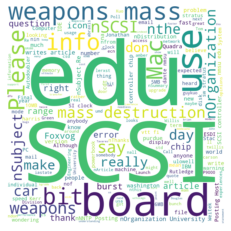

In [21]:
other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = str(newsgroups_data_sample['data'][:10])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=200,
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### alice.txt

In [22]:
text = open('alice.txt').read()

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [25]:
wordcloud = WordCloud().generate(text)

In [26]:
wordcloud.words_

{'Alice': 1.0,
 'said': 0.7387387387387387,
 'little': 0.4774774774774775,
 'said Alice': 0.44144144144144143,
 'one': 0.32432432432432434,
 'Queen': 0.27927927927927926,
 'Mouse': 0.24324324324324326,
 'now': 0.23423423423423423,
 'went': 0.22522522522522523,
 'came': 0.22522522522522523,
 'door': 0.22522522522522523,
 'voice': 0.22522522522522523,
 'Illustration': 0.21621621621621623,
 'time': 0.21621621621621623,
 'well': 0.2072072072072072,
 'Rabbit': 0.1981981981981982,
 'large': 0.1981981981981982,
 'Duchess': 0.1981981981981982,
 'go': 0.1981981981981982,
 'way': 0.1891891891891892,
 'found': 0.1891891891891892,
 'first': 0.1891891891891892,
 'thing': 0.1891891891891892,
 'know': 0.1891891891891892,
 'see': 0.18018018018018017,
 'cat': 0.18018018018018017,
 'great': 0.17117117117117117,
 'began': 0.17117117117117117,
 'quite': 0.17117117117117117,
 'hand': 0.17117117117117117,
 'Oh': 0.16216216216216217,
 'looked': 0.16216216216216217,
 'moment': 0.16216216216216217,
 'head': 0.

In [27]:
wordcloud = WordCloud(max_font_size=40).generate(text)

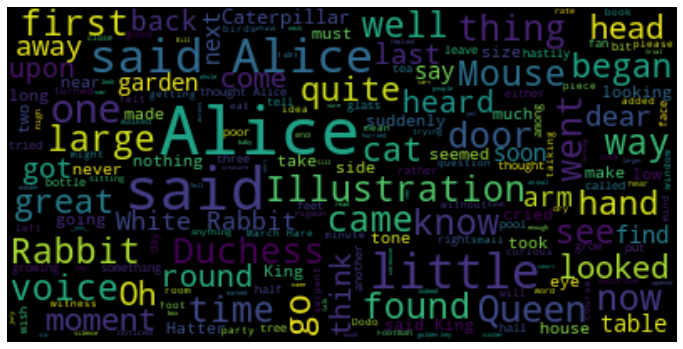

In [29]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 연습문제
## 미국 대통령 연설문 word cloud 만들기

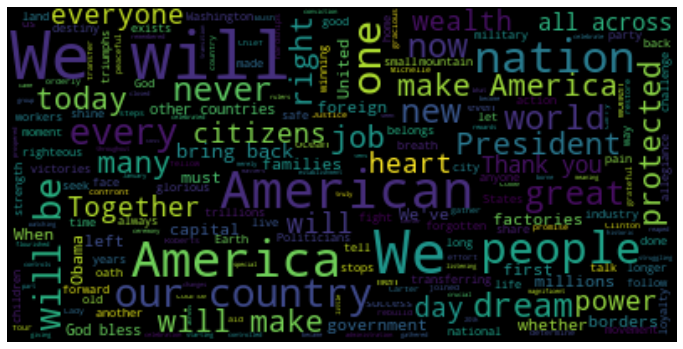

In [12]:
#Donald Trump
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = open('donald.txt').read()

wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

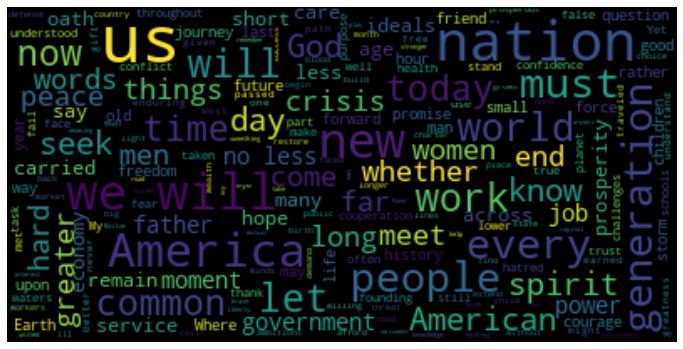

In [11]:
#Obama
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = open('obama.txt').read()

wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

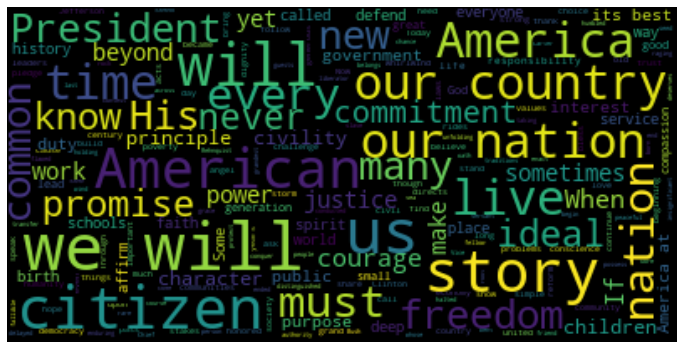

In [9]:
#Bush
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = open('bush.txt').read()

wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

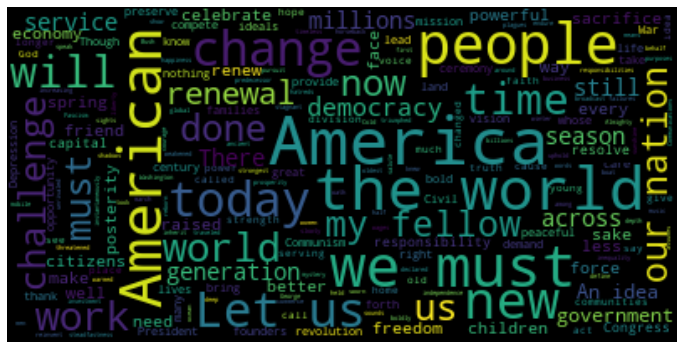

In [8]:
#Clinton
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = open('clinton.txt').read()

wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()